In [1]:
import os
import json
import pandas as pd
import numpy as np

from datasets import load_dataset

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

In [2]:
video_mme = load_dataset("lmms-lab/Video-MME")
df = video_mme["test"].to_pandas()

In [3]:
df.shape

(2700, 11)

In [4]:
df.sample(5)

,video_id,duration,domain,sub_category,url,videoID,question_id,task_type,question,options,answer
607,203,short,Artistic Performance,Variety Show,https://www.youtube.com/watch?v=mD_7mhnPS_Y,mD_7mhnPS_Y,203-2,Action Reasoning,Why were the two people so happy in the video?,[A. Because they practiced for eight hours a d...,D
2509,837,long,Life Record,Food,https://www.youtube.com/watch?v=4VniCsSusJs,4VniCsSusJs,837-2,Action Reasoning,Why do they throw food in a big bowl?,"[A. Prepare to throw them away., B. Serve food...",C
382,128,short,Film & Television,News Report,https://www.youtube.com/watch?v=EJ_yarUrgVQ,EJ_yarUrgVQ,128-2,Object Recognition,What happened in the mountains captured in the...,"[A. Fire., B. Landslides., C. Bonfire Party., ...",A
274,092,short,Film & Television,Animation,https://www.youtube.com/watch?v=3rTsETO3s9U,3rTsETO3s9U,092-2,Action Recognition,What does the girl's mom want her to do in thi...,"[A. Seeing a movie., B. Exercising., C. Playin...",D
1196,399,medium,Film & Television,Animation,https://www.youtube.com/watch?v=I5cFBi02O34,I5cFBi02O34,399-3,Action Reasoning,Why does the hero take the last monster back?,[A. He falls in love with the monster princess...,B


In [5]:
df["task_type"].unique()

array(['Counting Problem', 'Information Synopsis', 'Object Recognition',
       'Action Reasoning', 'Object Reasoning', 'Temporal Perception',
       'Attribute Perception', 'Temporal Reasoning', 'Action Recognition',
       'OCR Problems', 'Spatial Perception', 'Spatial Reasoning'],
      dtype=object)

In [6]:
df["duration"].unique()

array(['short', 'medium', 'long'], dtype=object)

In [7]:
df["domain"].unique()

array(['Knowledge', 'Film & Television', 'Sports Competition',
       'Artistic Performance', 'Life Record', 'Multilingual'],
      dtype=object)

In [8]:
df["sub_category"].unique()

array(['Humanity & History', 'Literature & Art', 'Biology & Medicine',
       'Finance & Commerce', 'Astronomy', 'Geography', 'Law', 'Life Tip',
       'Technology', 'Animation', 'Movie & TV Show', 'Documentary',
       'News Report', 'Esports', 'Basketball', 'Football', 'Athletics',
       'Other Sports', 'Stage Play', 'Magic Show', 'Variety Show',
       'Acrobatics', 'Handicraft', 'Food', 'Fashion', 'Daily Life',
       'Travel', 'Pet & Animal', 'Exercise', 'Multilingual'], dtype=object)

In [9]:
# df["task_type"].nunique() * df["sub_category"].nunique() * df["domain"].nunique() * df["duration"].nunique()
# df["task_type"].nunique() * df["sub_category"].nunique() #* df["domain"].nunique() * df["duration"].nunique()
df["task_type"].nunique(), df["sub_category"].nunique(), df["domain"].nunique(), df["duration"].nunique()

(12, 30, 6, 3)

In [10]:
df[df['task_type'] == "Counting Problem"].sample(15)

,video_id,duration,domain,sub_category,url,videoID,question_id,task_type,question,options,answer
1327,443,medium,Sports Competition,Basketball,https://www.youtube.com/watch?v=cPlpZdGLa5A,cPlpZdGLa5A,443-2,Counting Problem,How many free throws does Jamal hit in game 2?,"[A. 7., B. 8., C. 10., D. 9.]",D
1272,425,medium,Film & Television,News Report,https://www.youtube.com/watch?v=HK13nVxBYxI,HK13nVxBYxI,425-1,Counting Problem,How many people were interviewed in the video?,"[A. 4., B. 2., C. 1., D. 3.]",B
1247,416,medium,Film & Television,Documentary,https://www.youtube.com/watch?v=B7-6lRo2m4Y,B7-6lRo2m4Y,416-3,Counting Problem,The video mentions that when penguins huddle t...,"[A. 37., B. 27., C. -27., D. 0.]",A
892,298,short,Multilingual,Multilingual,https://www.youtube.com/watch?v=4ZK-m01XSQ8,4ZK-m01XSQ8,298-2,Counting Problem,What was the total number of athletes who part...,"[A. 8., B. 7., C. 6., D. 9.]",B
900,301,medium,Knowledge,Humanity & History,https://www.youtube.com/watch?v=dphq5X-rMew,dphq5X-rMew,301-1,Counting Problem,"According to the video, how many man-made ditc...","[A. 4., B. 2., C. 3., D. 1.]",C
1294,432,medium,Sports Competition,Esports,https://www.youtube.com/watch?v=OApAF--FqLA,OApAF--FqLA,432-2,Counting Problem,How many times is Vi slain in this video?,"[A. 1., B. 2., C. 3., D. 4.]",A
0,001,short,Knowledge,Humanity & History,https://www.youtube.com/watch?v=fFjv93ACGo8,fFjv93ACGo8,001-1,Counting Problem,When demonstrating the Germany modern Christma...,"[A. Apples., B. Candles., C. Berries., D. The ...",C
2222,741,long,Sports Competition,Basketball,https://www.youtube.com/watch?v=U9-Qy3H_UBY,U9-Qy3H_UBY,741-3,Counting Problem,How many 3-pointers does the college freshman ...,"[A. 3., B. 4., C. 2., D. 1.]",C
855,286,short,Life Record,Exercise,https://www.youtube.com/watch?v=5kmnEgBSCfg,5kmnEgBSCfg,286-1,Counting Problem,How many sets of jumps did the two men do in t...,"[A. 3., B. 6., C. 4., D. 5.]",D
1355,452,medium,Sports Competition,Football,https://www.youtube.com/watch?v=Xim8-lUZnsA,Xim8-lUZnsA,452-3,Counting Problem,In which skill are there only three people on ...,"[A. No.10 skill., B. No.7 skill., C. No.13 ski...",D


In [28]:
# For each unique task_type, sample 5 rows and display them
# Turn off column width limit to see full text in each cell

pd.set_option('display.max_colwidth', None)

task_types = df['task_type'].unique()
num_samples = 10

for task in task_types:
    print(f"=== Task Type: {task} ===")
    sample_rows = df[df['task_type'] == task].sample(n=num_samples, random_state=42) if len(df[df['task_type'] == task]) >= num_samples else df[df['task_type'] == task].copy()
    # print the index along with the row data
    for idx, row in sample_rows.iterrows():
        row_dict = {
            'idx': idx,
            'duration': row['duration'],
            'domain': row['domain'],
            'task_type': row['task_type'],
            'sub_category': row['sub_category'],
            'question': row['question'],
            'options': row['options'],
            'answer': row['answer'],
        }
        print(row_dict)
    print()
    print()

=== Task Type: Counting Problem ===
{'idx': 831, 'duration': 'short', 'domain': 'Life Record', 'task_type': 'Counting Problem', 'sub_category': 'Pet & Animal', 'question': 'How many foxes appear in this video?', 'options': array(['A. 1.', 'B. 2.', 'C. 3.', 'D. 4.'], dtype=object), 'answer': 'B'}
{'idx': 1752, 'duration': 'medium', 'domain': 'Life Record', 'task_type': 'Counting Problem', 'sub_category': 'Exercise', 'question': "How many of the tricks presented in the video involve drilling the ball through a defender's crotch?", 'options': array(['A. 3.', 'B. 4.', 'C. 6.', 'D. 2.'], dtype=object), 'answer': 'A'}
{'idx': 200, 'duration': 'short', 'domain': 'Knowledge', 'task_type': 'Counting Problem', 'sub_category': 'Law', 'question': 'How many adult men, aged 18 years or older, can be seen in the video?', 'options': array(['A. 2.', 'B. 1.', 'C. 3.', 'D. 4.'], dtype=object), 'answer': 'B'}
{'idx': 985, 'duration': 'medium', 'domain': 'Knowledge', 'task_type': 'Counting Problem', 'sub_c

In [64]:
df.iloc[1417]["options"]

array(['A. SINGAPORE.', 'B. SUZHOU.', 'C. Sudirman.', 'D. HANGZHOU.'],
      dtype=object)

In [28]:
df.keys()

Index(['video_id', 'duration', 'domain', 'sub_category', 'url', 'videoID',
       'question_id', 'task_type', 'question', 'options', 'answer'],
      dtype='object')

In [38]:
keys = ['duration', 'domain', 'sub_category', 'videoID', 'task_type', 'answer']

# df["duration"].value_counts()
for key in keys:
    print(df[key].value_counts())
    print()

duration
short     900
medium    900
long      900
Name: count, dtype: int64

domain
Knowledge               810
Life Record             630
Sports Competition      450
Film & Television       360
Artistic Performance    360
Multilingual             90
Name: count, dtype: int64

sub_category
Humanity & History    90
Literature & Art      90
Biology & Medicine    90
Finance & Commerce    90
Astronomy             90
Geography             90
Law                   90
Life Tip              90
Technology            90
Animation             90
Movie & TV Show       90
Documentary           90
News Report           90
Esports               90
Basketball            90
Football              90
Athletics             90
Other Sports          90
Stage Play            90
Magic Show            90
Variety Show          90
Acrobatics            90
Handicraft            90
Food                  90
Fashion               90
Daily Life            90
Travel                90
Pet & Animal          90
Exercis

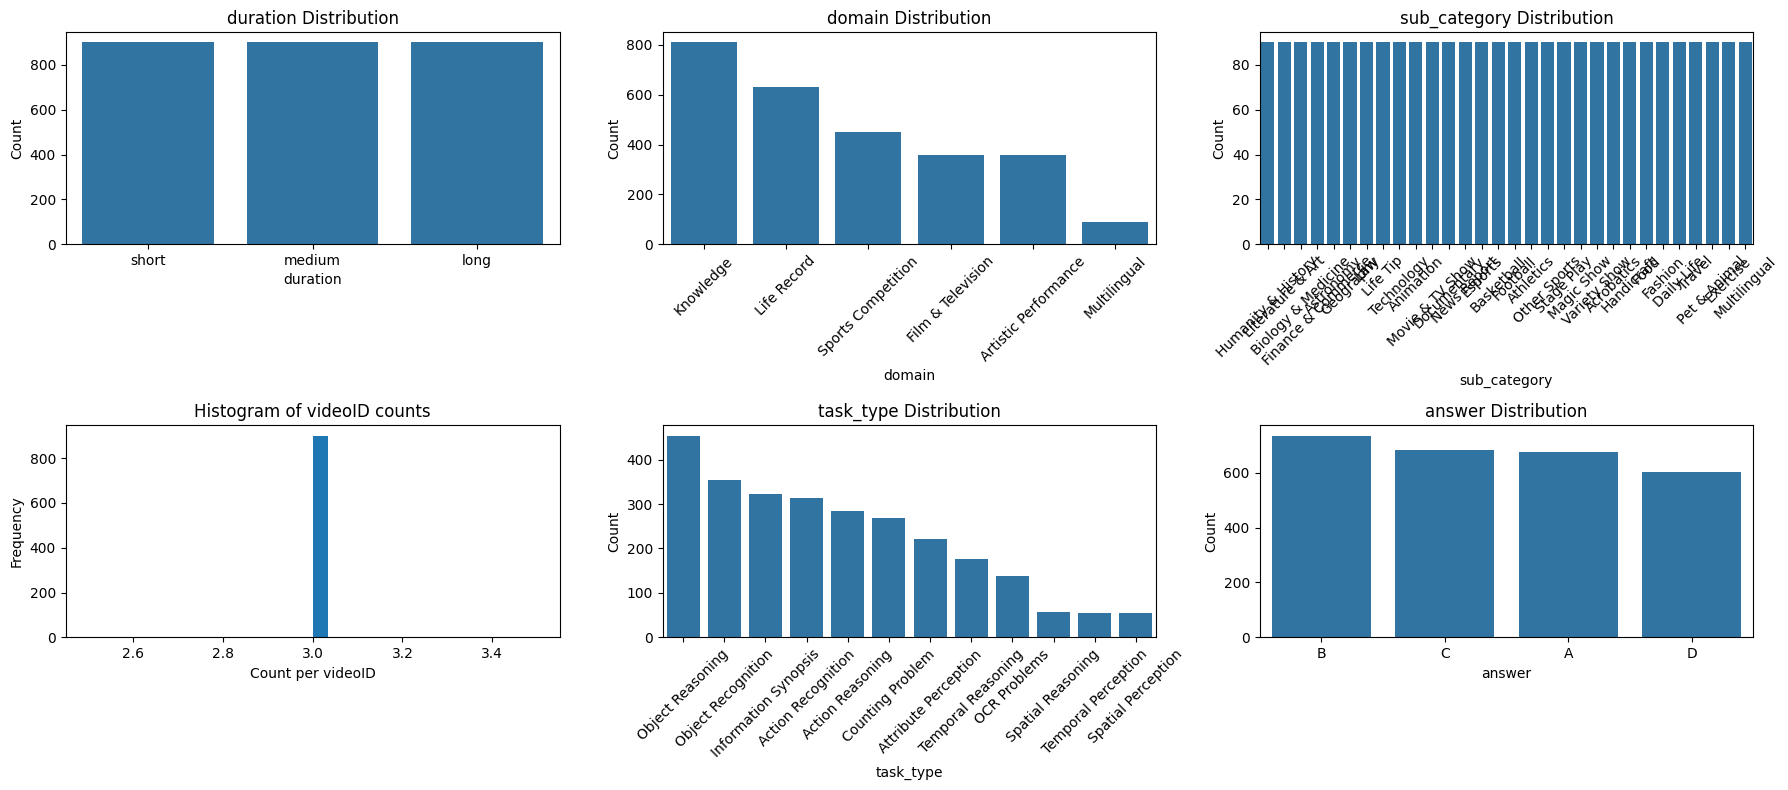

In [40]:
keys = ['duration', 'domain', 'sub_category', 'videoID', 'task_type', 'answer']

n_keys = len(keys)
n_cols = 3
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 8))
axes = axes.flatten()

for i, key in enumerate(keys):
    ax = axes[i]
    # For categorical columns, use countplot; for videoID, use histogram
    if key == 'videoID':
        # videoID is likely categorical but with many unique values, so plot histogram of counts per videoID
        df[key].value_counts().plot(kind='hist', bins=30, ax=ax)
        ax.set_title(f'Histogram of {key} counts')
        ax.set_xlabel('Count per videoID')
        ax.set_ylabel('Frequency')
    else:
        sns.countplot(data=df, x=key, order=df[key].value_counts().index, ax=ax)
        ax.set_title(f'{key} Distribution')
        ax.set_xlabel(key)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45 if df[key].nunique() > 5 else 0)

# Hide any unused subplots
for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

/tmp/ipykernel_3913799/3850715107.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


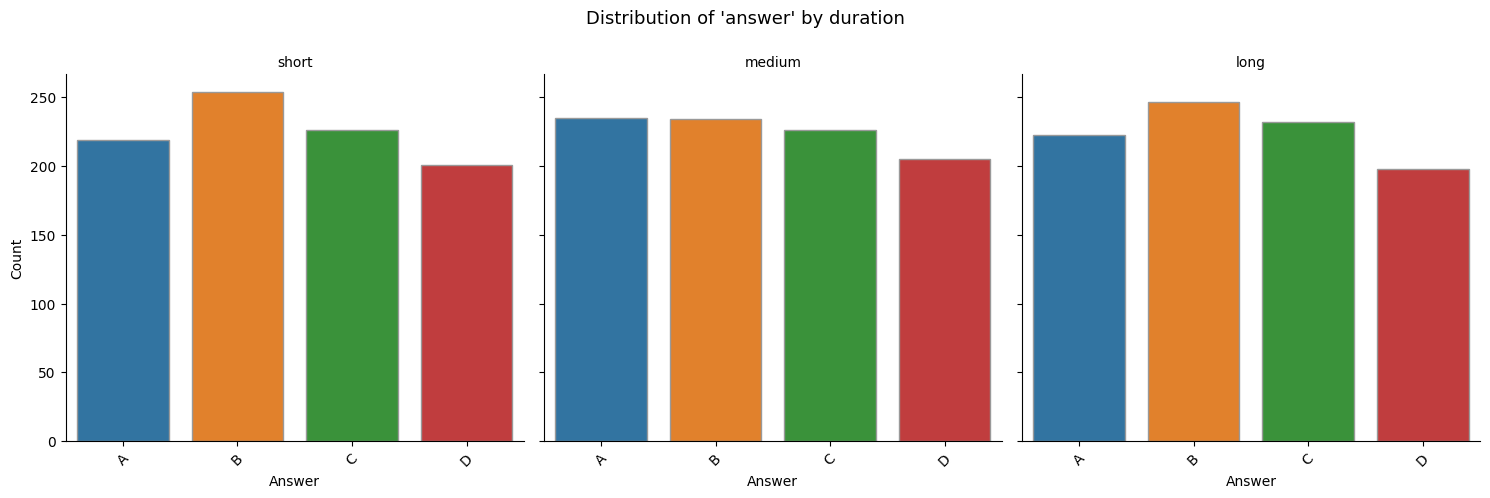

/tmp/ipykernel_3913799/3850715107.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


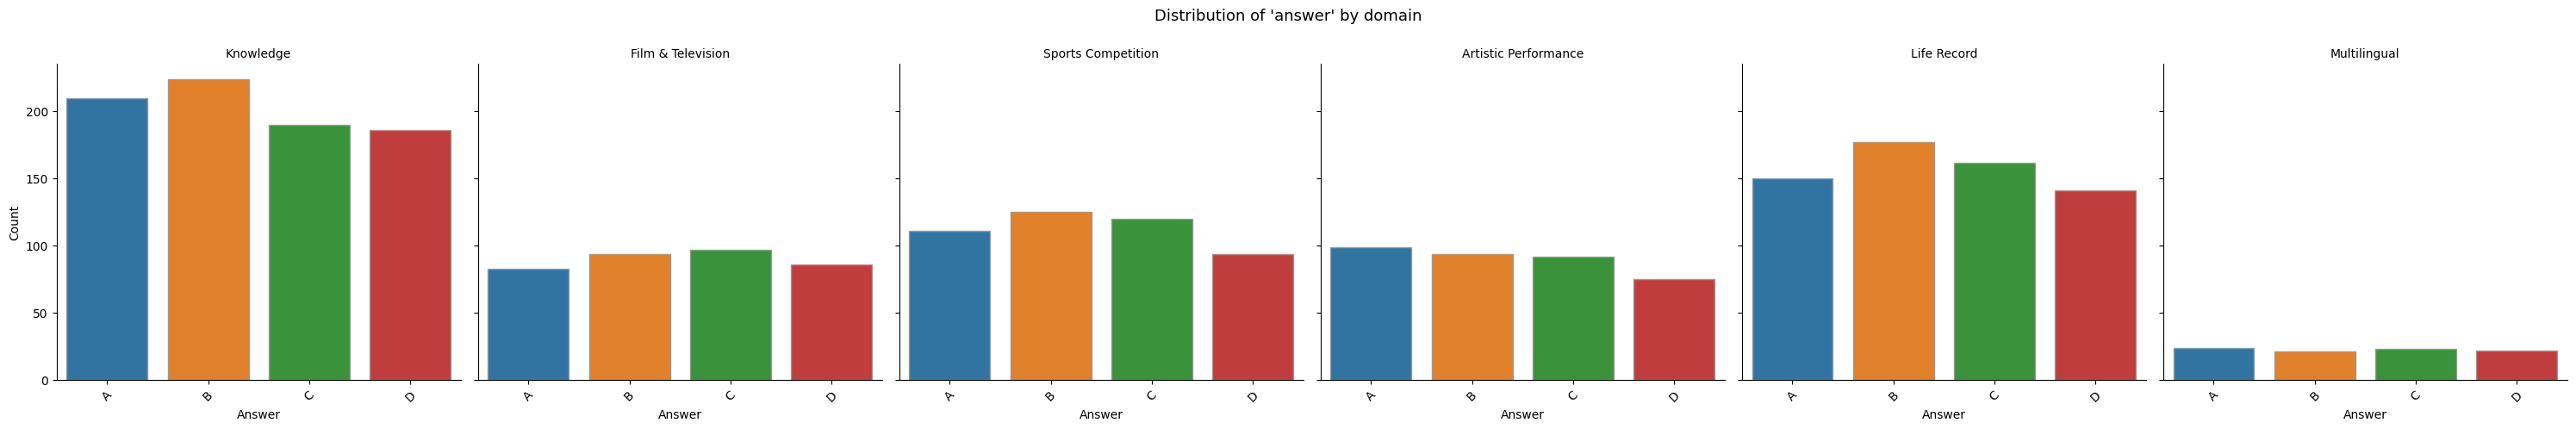

/tmp/ipykernel_3913799/3850715107.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


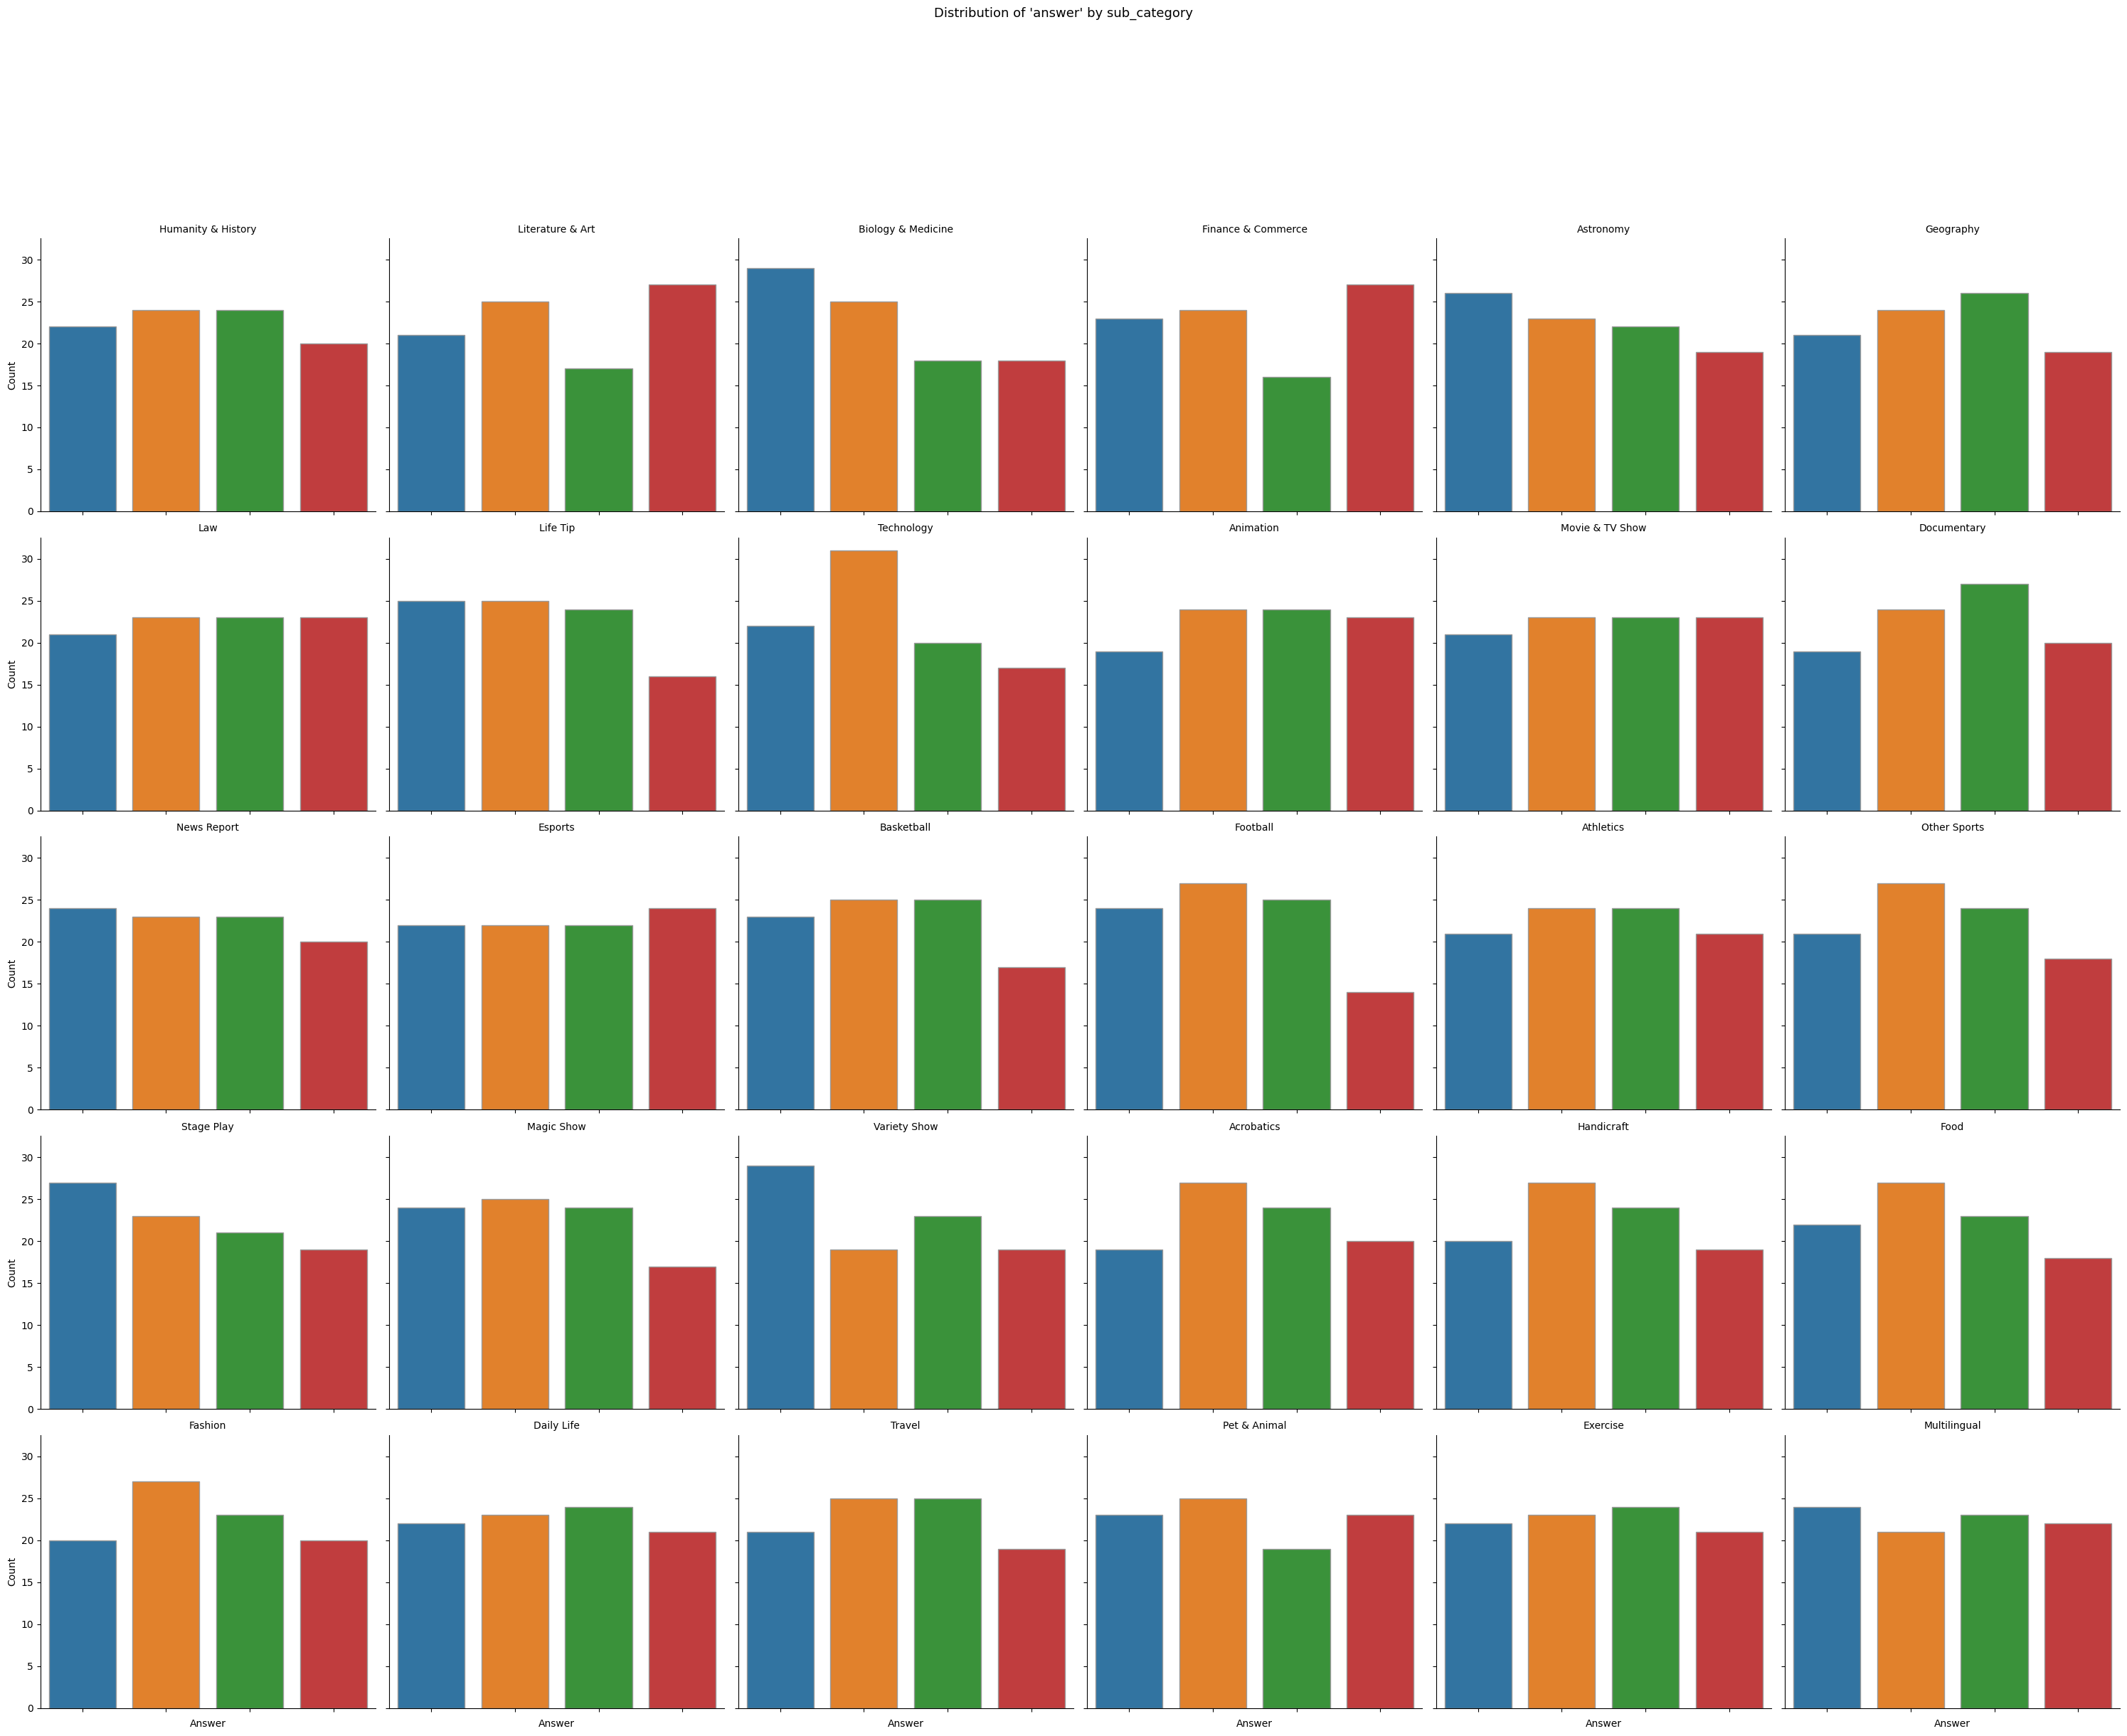

/tmp/ipykernel_3913799/3850715107.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


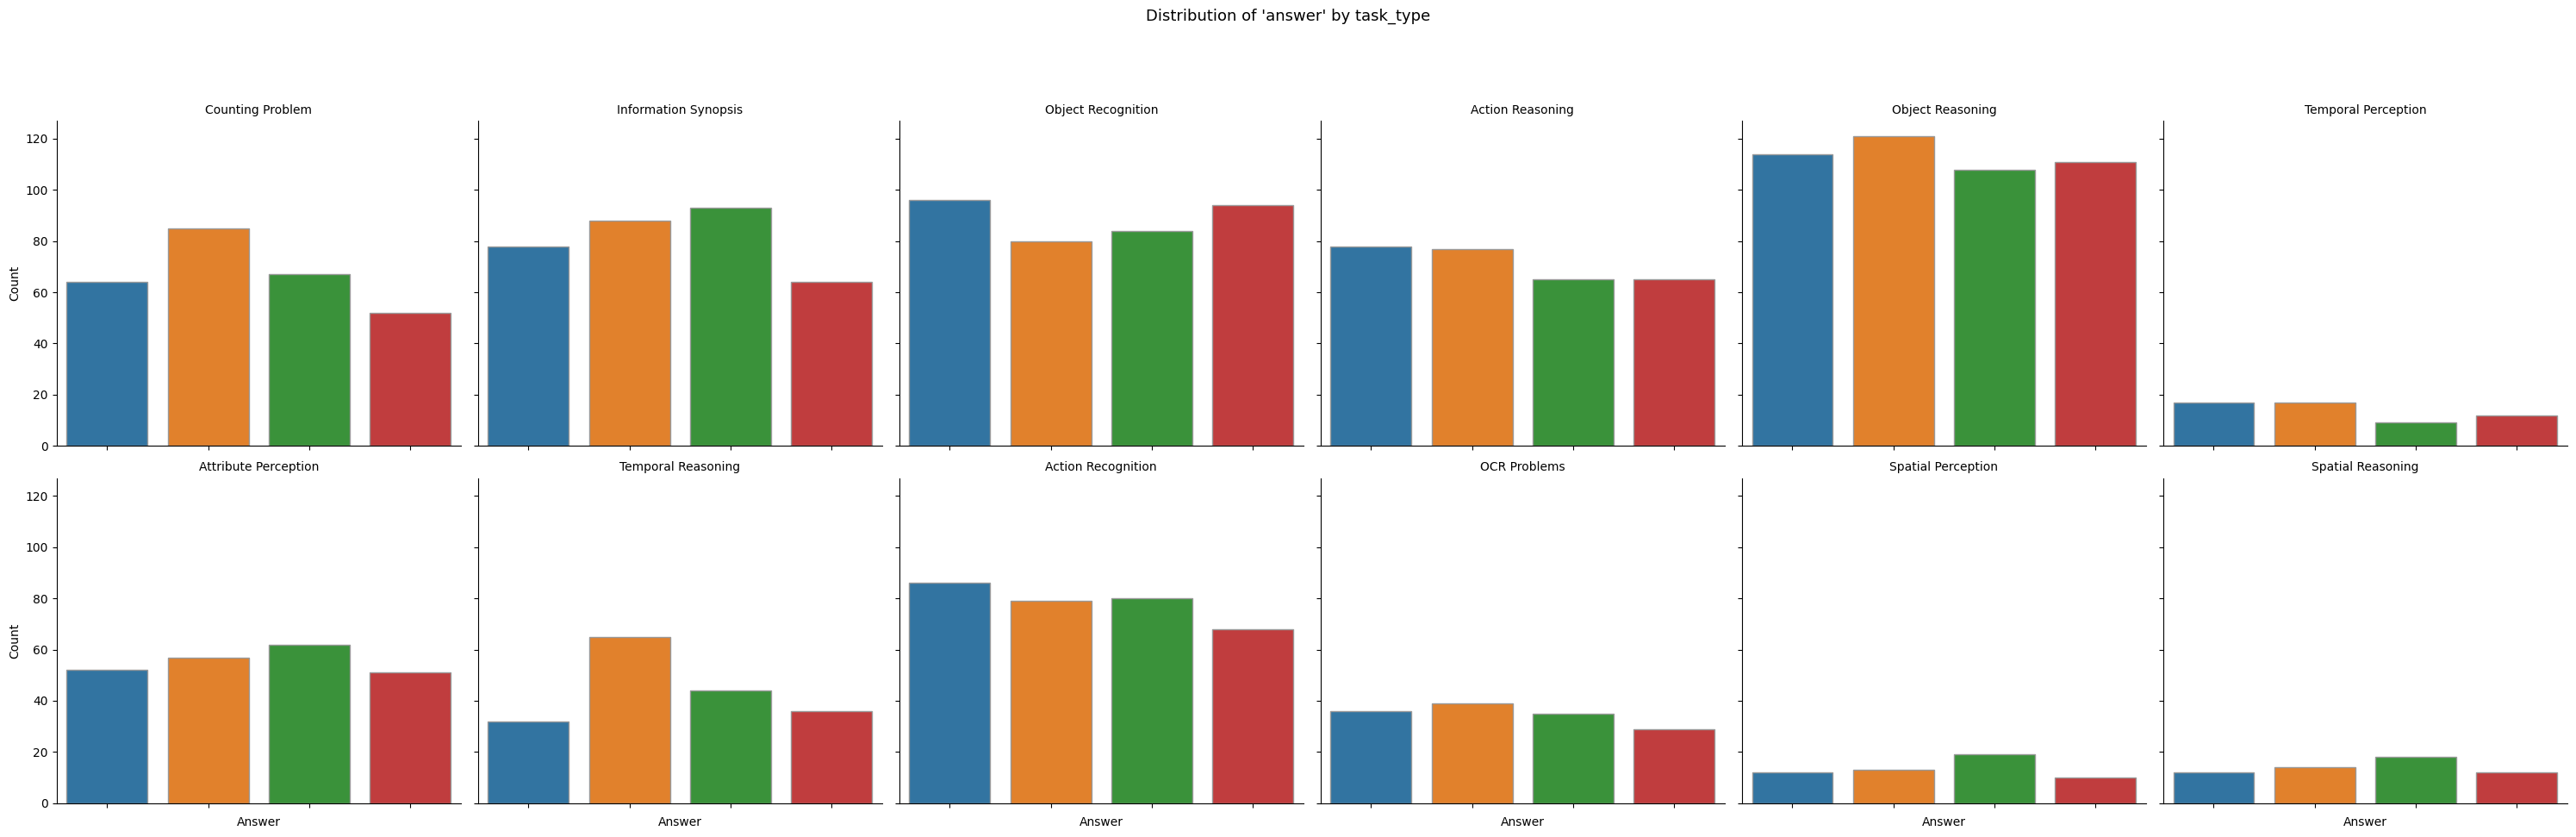

In [61]:
import seaborn as sns

keys = ['duration', 'domain', 'sub_category', 'task_type']

max_cols = 6

for key in keys:
    n_unique = df[key].nunique()
    col_wrap = max_cols if n_unique > max_cols else n_unique
    # aspect = 3.0

    g = sns.catplot(
        data=df,
        x="answer",
        col=key,
        kind="count",
        col_wrap=col_wrap,
        # height=height,
        # aspect=aspect,
        order=sorted(df['answer'].unique()),
        palette="tab10",
        edgecolor=".6"
    )
    g.set_titles("{col_name}")
    g.set_axis_labels("Answer", "Count")
    g.set_xticklabels(rotation=45)
    g.fig.subplots_adjust(top=0.85)
    g.fig.suptitle(f"Distribution of 'answer' by {key}", fontsize=13)
    plt.show()


Task type distribution per domain:
task_type             Action Reasoning  Action Recognition  \
domain                                                       
Artistic Performance                40                  56   
Film & Television                   72                  43   
Knowledge                           48                  39   
Life Record                         67                 100   
Multilingual                        11                  10   
Sports Competition                  47                  65   

task_type             Attribute Perception  Counting Problem  \
domain                                                         
Artistic Performance                    40                38   
Film & Television                       37                28   
Knowledge                               79                63   
Life Record                             39                63   
Multilingual                             7                 7   
Sports Competition  

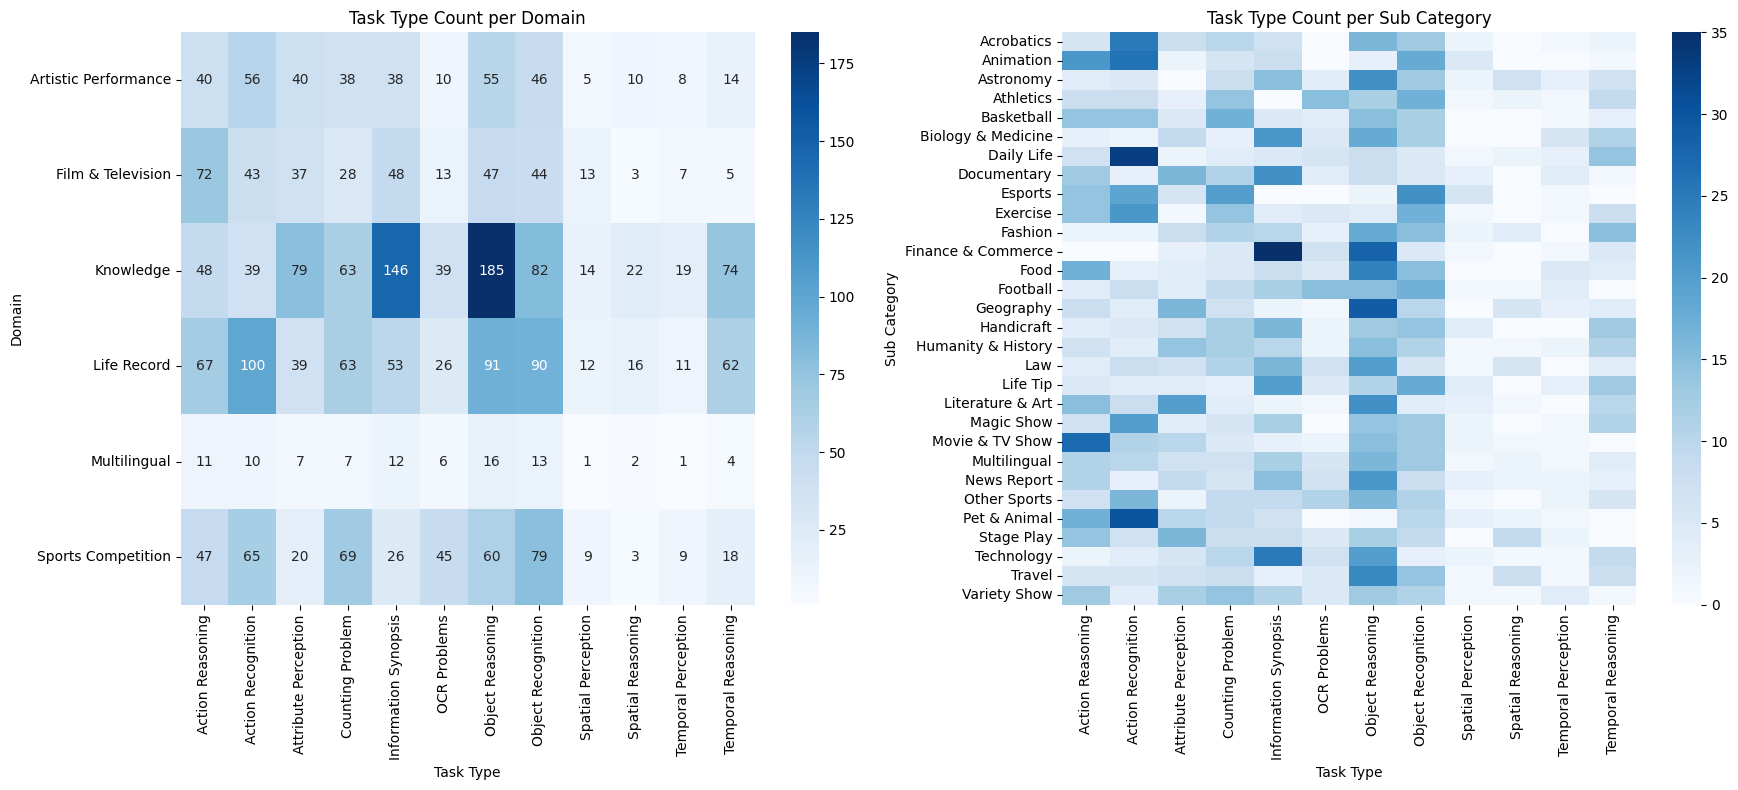

In [31]:
# Task type distribution per domain
print("Task type distribution per domain:")
task_per_domain = df.groupby(['domain', 'task_type']).size().unstack(fill_value=0)
print(task_per_domain)
print()

# Task type distribution per sub_category
print("Task type distribution per sub_category:")
task_per_subcat = df.groupby(['sub_category', 'task_type']).size().unstack(fill_value=0)
print(task_per_subcat)
print()

# Optionally, visualize as heatmaps
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.heatmap(task_per_domain, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Task Type Count per Domain')
axes[0].set_xlabel('Task Type')
axes[0].set_ylabel('Domain')

sns.heatmap(task_per_subcat, annot=False, cmap='Blues', ax=axes[1])
axes[1].set_title('Task Type Count per Sub Category')
axes[1].set_xlabel('Task Type')
axes[1].set_ylabel('Sub Category')

plt.tight_layout()
plt.show()


/home/ellisbrown/workspace/test-set-training/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/ellisbrown/workspace/test-set-training/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/ellisbrown/workspace/test-set-training/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/ellisbrown/workspace/test-set-t

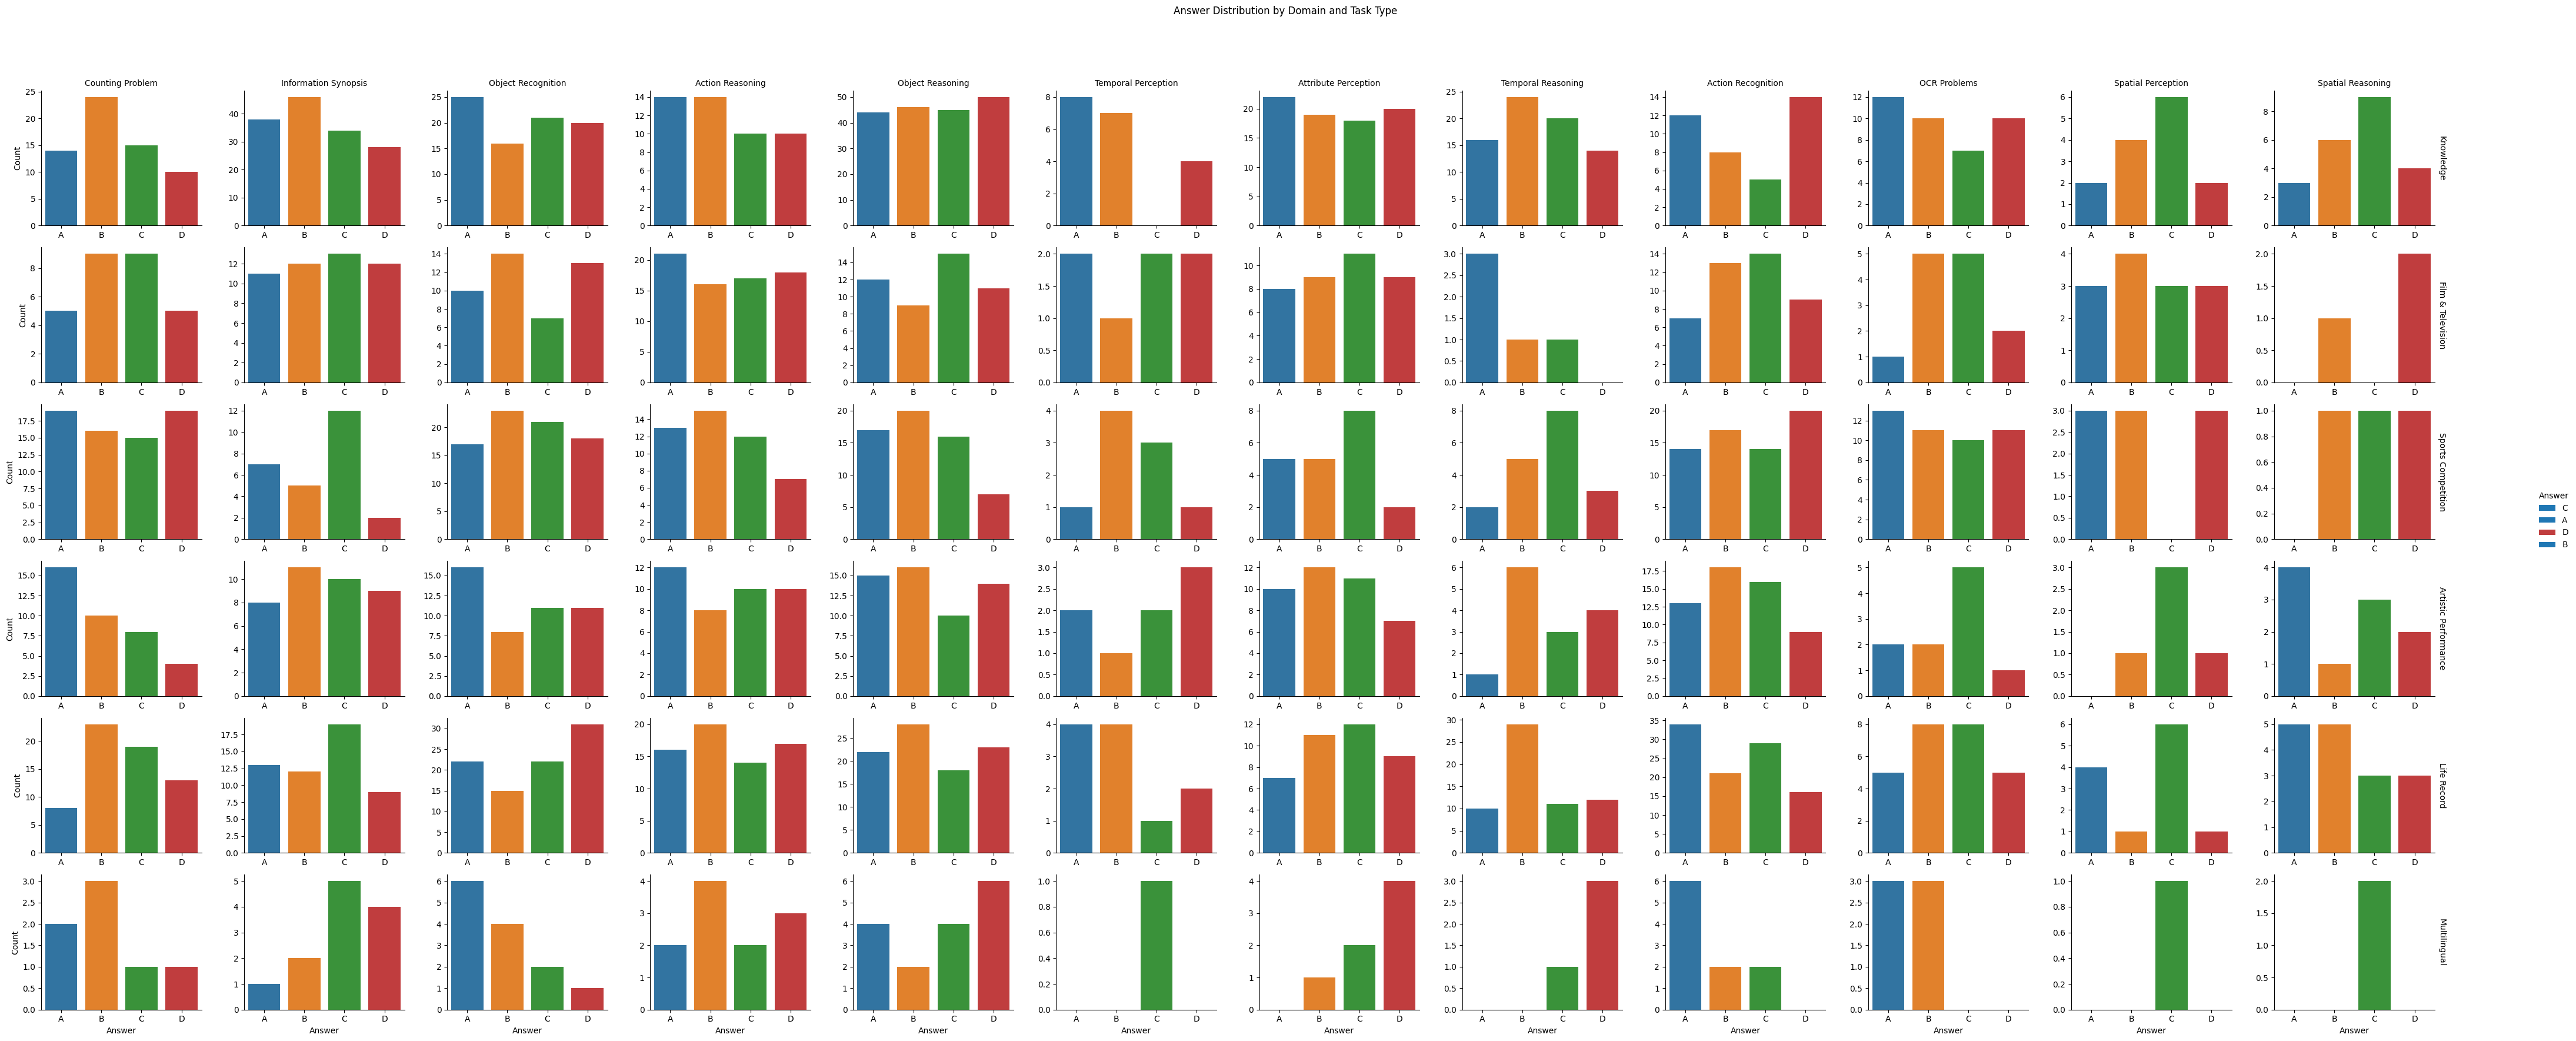

In [42]:
# FacetGrid: domain as row, task_type as col, hue by answer
import seaborn as sns
import matplotlib.pyplot as plt

# For visualization, let's use a countplot for each facet
g = sns.FacetGrid(
    df, 
    row="domain", 
    col="task_type", 
    hue="answer", 
    margin_titles=True,
    sharex=False, 
    sharey=False,
    height=3, 
    aspect=1.2
)
g.map(sns.countplot, "answer", order=sorted(df["answer"].unique()), palette="tab10", dodge=False)
g.add_legend(title="Answer")
g.set_axis_labels("Answer", "Count")
g.set_titles(row_template='{row_name}', col_template='{col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Answer Distribution by Domain and Task Type")
plt.show()


/home/ellisbrown/workspace/test-set-training/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/ellisbrown/workspace/test-set-training/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/ellisbrown/workspace/test-set-training/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/ellisbrown/workspace/test-set-t

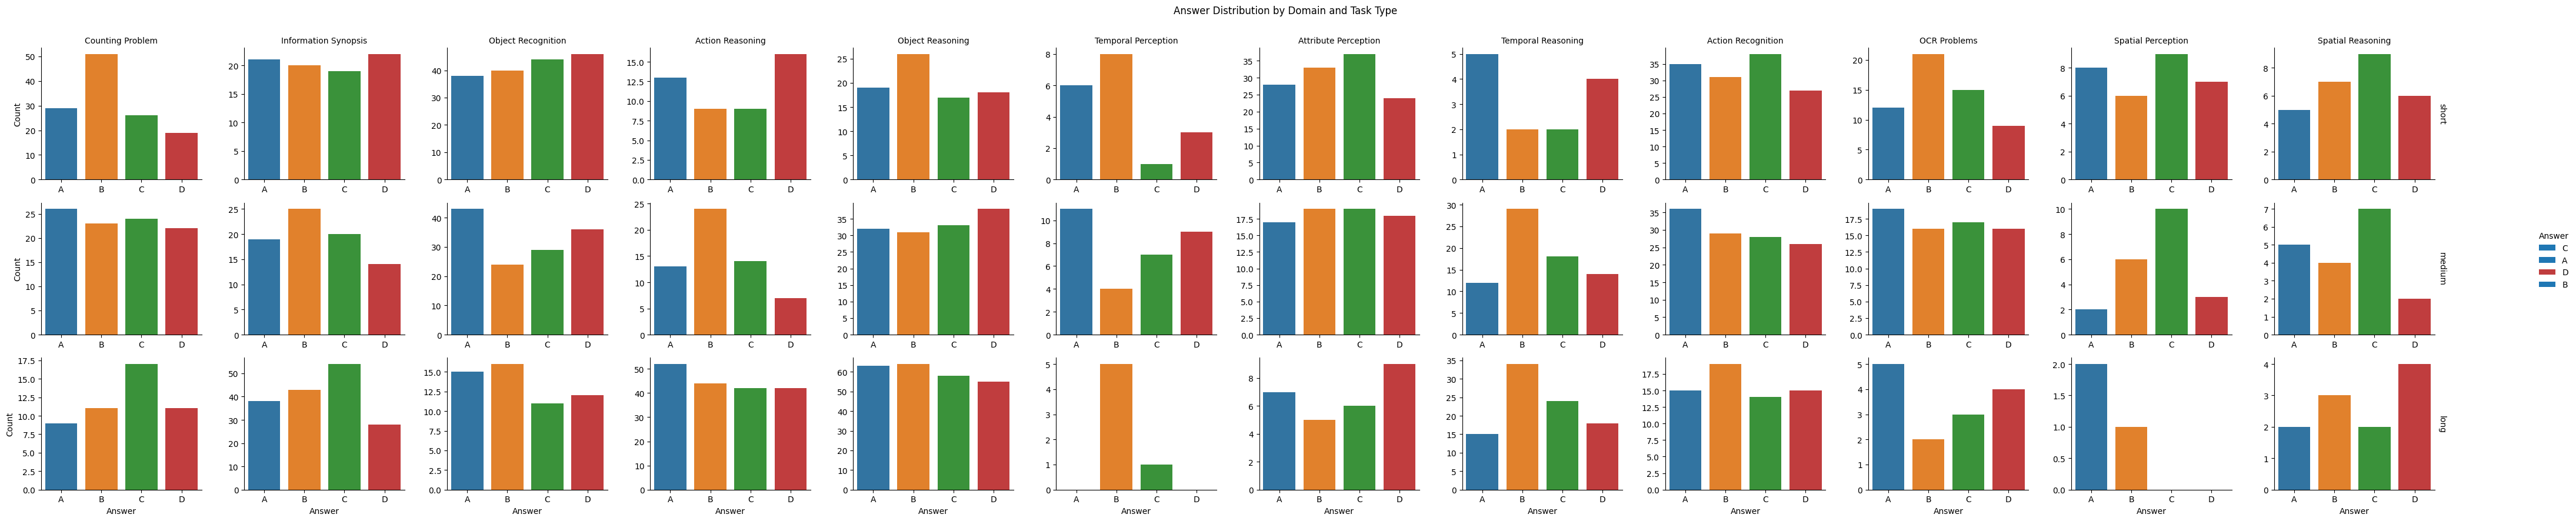

In [43]:
# FacetGrid: domain as row, task_type as col, hue by answer
import seaborn as sns
import matplotlib.pyplot as plt

# For visualization, let's use a countplot for each facet
g = sns.FacetGrid(
    df, 
    row="duration", 
    col="task_type", 
    hue="answer", 
    margin_titles=True,
    sharex=False, 
    sharey=False,
    height=3, 
    aspect=1.2
)
g.map(sns.countplot, "answer", order=sorted(df["answer"].unique()), palette="tab10", dodge=False)
g.add_legend(title="Answer")
g.set_axis_labels("Answer", "Count")
g.set_titles(row_template='{row_name}', col_template='{col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Answer Distribution by Domain and Task Type")
plt.show()


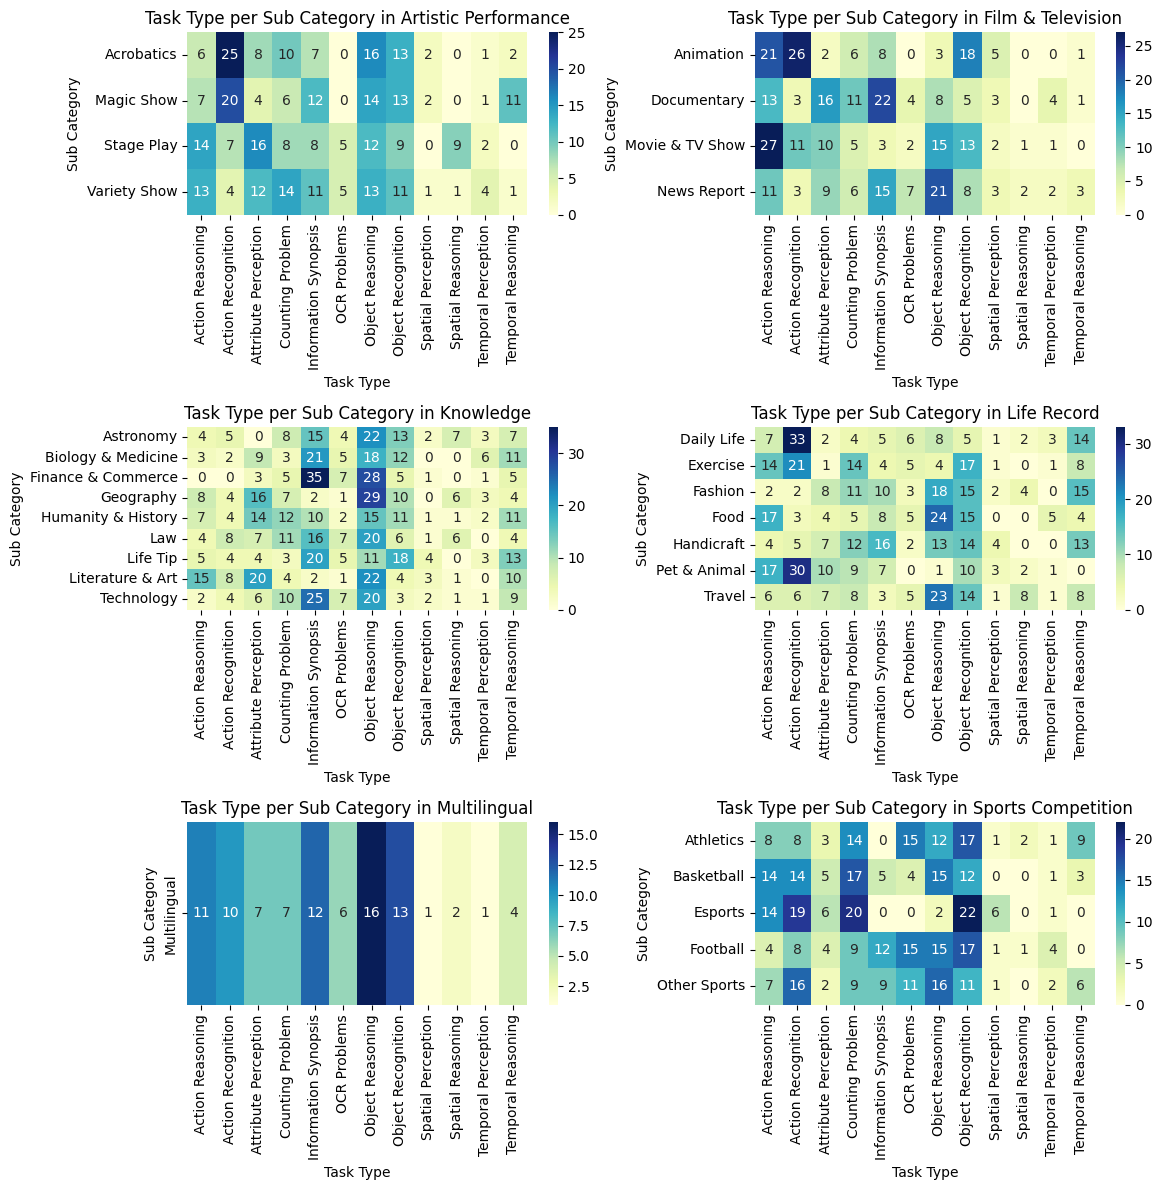

In [34]:
# Analyze sub_category per domain and task type

# Create a pivot table: rows=sub_category, columns=domain, values=task_type counts
subcat_domain_task = df.groupby(['domain', 'sub_category', 'task_type']).size().unstack(fill_value=0)

# Visualize as heatmaps for each domain, arranged in 3 rows
import matplotlib.pyplot as plt
import seaborn as sns

domains = subcat_domain_task.index.get_level_values('domain').unique()
n_domains = len(domains)
n_rows = 3
n_cols = (n_domains + n_rows - 1) // n_rows  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows), squeeze=False)

for idx, domain in enumerate(domains):
    row = idx // n_cols
    col = idx % n_cols
    data = subcat_domain_task.loc[domain]
    sns.heatmap(data, annot=True, fmt='d', cmap='YlGnBu', ax=axes[row, col])
    axes[row, col].set_title(f'Task Type per Sub Category in {domain}')
    axes[row, col].set_xlabel('Task Type')
    axes[row, col].set_ylabel('Sub Category')

# Hide any unused subplots
for idx in range(len(domains), n_rows * n_cols):
    row = idx // n_cols
    col = idx % n_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()
